In [20]:
import pandas as pd

class data_holder:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.df = self.data.copy()

# Load data
temp = data_holder('./Climate/temperatureAnomalies.csv')
df = temp.df

global_temp_df = df[df['Year'] >= 1900]
global_temp_df = global_temp_df[global_temp_df['Year'] <= 2021]

# Display the result
print(global_temp_df.head())


    Year  No_Smoothing  Lowess(5)
20  1900         -0.08      -0.20
21  1901         -0.15      -0.23
22  1902         -0.28      -0.26
23  1903         -0.37      -0.28
24  1904         -0.47      -0.31


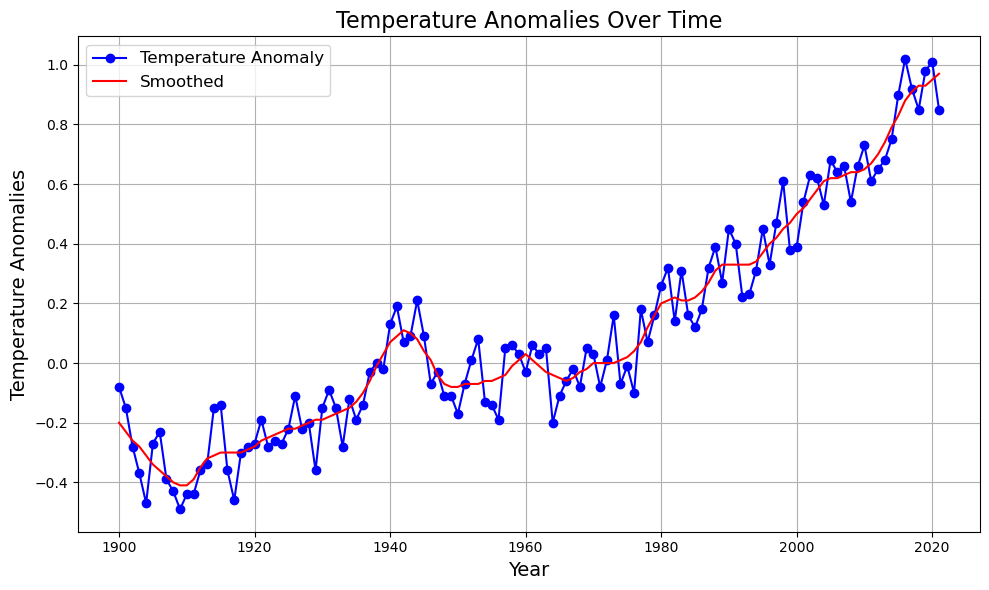

In [24]:
import matplotlib.pyplot as plt


# Plot AverageTemp vs Year
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(global_temp_df['Year'], global_temp_df['No_Smoothing'], marker='o', linestyle='-', color='b', label='Temperature Anomaly')
plt.plot(global_temp_df['Year'], global_temp_df['Lowess(5)'], linestyle='-', color='r', label='Smoothed')

# Customize the plot
plt.title('Temperature Anomalies Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature Anomalies', fontsize=14)
plt.grid(True)  # Add a grid
plt.legend(fontsize=12)  # Add a legend
plt.tight_layout()  # Adjust layout for better appearance

# Show the plot
plt.show()

## Combine with disaster data

In [27]:
disasters = data_holder('./DISASTERS/1900_2021_DISASTERS.xlsx - emdat data.csv')

# Reset index to turn 'Year' into a regular column
temp_df = global_temp_df.reset_index()

# Merge on 'Year'
combined_df = pd.merge(temp_df, disasters.df, on='Year', how='inner')

print(combined_df.shape)
combined_df.head()

(16126, 48)


,index,Year,No_Smoothing,Lowess(5),Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,20,1900,-0.08,-0.2,9002,NaN,Natural,Climatological,Drought,Drought,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,20,1900,-0.08,-0.2,9001,NaN,Natural,Climatological,Drought,Drought,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,20,1900,-0.08,-0.2,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,...,NaN,NaN,NaN,NaN,30000.0,3.221647,NaN,NaN,NaN,NaN
3,20,1900,-0.08,-0.2,7,NaN,Natural,Biological,Epidemic,Viral disease,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
4,20,1900,-0.08,-0.2,6,NaN,Natural,Hydrological,Flood,NaN,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
